## PCA Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target

In [3]:
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

In [4]:
print("Shape of data:", X.shape)
print("\n")

print("Feature names:", data.feature_names)
print("\n")

print("Target classes:", data.target_names)
print("\n")

print("\nDescriptive Statistics:")
print(df.describe())
print("\n")

print("\nClass distribution:")
print(df['target'].value_counts().sort_index().rename(index=dict(enumerate(data.target_names))))
print("\n")

Shape of data: (150, 4)


Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Target classes: ['setosa' 'versicolor' 'virginica']



Descriptive Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.30

In [5]:
num_components = 2

In [6]:
# Step 1: Standardize the data (zero mean)
X_meaned = X - np.mean(X, axis=0)

In [7]:
# Step 2: Compute the covariance matrix
cov_mat = np.cov(X_meaned, rowvar=False)

In [8]:
# Step 3: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_mat)

In [9]:
# Step 4: Sort eigenvectors by descending eigenvalues
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_index]
sorted_eigenvalues = eigenvalues[sorted_index]

In [10]:
# Step 5: Select the top k eigenvectors
eigenvector_subset = sorted_eigenvectors[:, 0:num_components]

In [11]:
# Step 6: Transform the data
X_reduced = np.dot(X_meaned, eigenvector_subset)

In [12]:
X_pca, eigen_vals, eigen_vecs = X_reduced, sorted_eigenvalues, eigenvector_subset

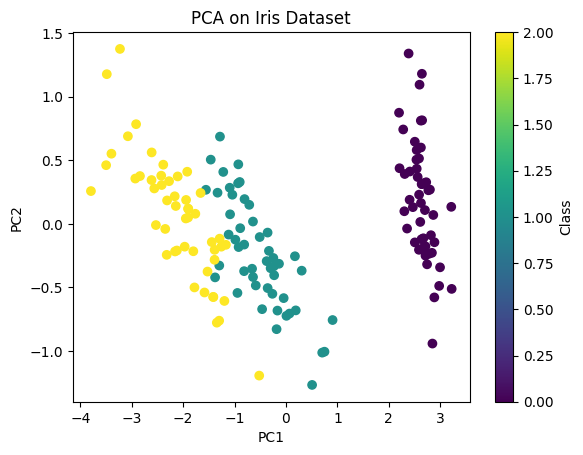

In [13]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA on Iris Dataset")
plt.colorbar(label='Class')
plt.show()